In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf
from datetime import datetime, timedelta
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [2]:
leads = pd.read_csv("~/Downloads/Code_Test/input/leads.csv")

In [3]:
deals = pd.read_csv("~/Downloads/Code_Test/input/deals.csv")

In [4]:
leads.head(5)

,agent_id,lead_id
0,89,0
1,65,1
2,3,2
3,62,3
4,48,4


In [5]:
leads['agent_id']=leads['agent_id'].apply(str)
leads['lead_id']=leads['lead_id'].apply(str)
#Changing agent_id & lead_id columns into a string to avoid aggreation issues

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   agent_id  100000 non-null  object
 1   lead_id   100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [7]:
deals.head(5)

,lead_id,signed,cancelled
0,9686,1,0
1,77444,0,0
2,85256,0,0
3,39030,1,0
4,22536,1,0


In [8]:
deals['lead_id']=deals['lead_id'].apply(str)
#Changing lead_id column into a string to avoid aggreation issues

In [9]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lead_id    13000 non-null  object
 1   signed     13000 non-null  int64 
 2   cancelled  13000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 304.8+ KB


In [10]:
# Merging the two data sets together on the lead_id column
ld =  pd.merge(deals, leads, on='lead_id')

In [11]:
ld.head(5)

,lead_id,signed,cancelled,agent_id
0,9686,1,0,85
1,77444,0,0,54
2,85256,0,0,87
3,39030,1,0,7
4,22536,1,0,97


In [12]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13000 entries, 0 to 12999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lead_id    13000 non-null  object
 1   signed     13000 non-null  int64 
 2   cancelled  13000 non-null  int64 
 3   agent_id   13000 non-null  object
dtypes: int64(2), object(2)
memory usage: 507.8+ KB


1. Provide a ranking of Sales Agent conversion (Deals signed from leads Assigned)

In [39]:
# Lets Group by lead_id and the agent_id on our ld data set
# Ranking will be based on the lead conversion to signed total

In [86]:
#Conversion Calculator tell me a Ratio of signed leads to canceled leads
# signed/canclled
age = ld[ld['agent_id'] == '99'] # <-- insert agent Id # to get total signed count, canceled count and conversion rates 
print(age.signed.sum())
print(age.cancelled.sum())
rate = 'conversion rate '
total_leads = (age.signed.sum() + age.cancelled.sum())
print('Converion Signed Rate', (age.signed.sum()/total_leads))
print('Converion Cancel Rate', (age.cancelled.sum()/total_leads *100), '%')

105
44
Converion Signed Rate 0.7046979865771812
Converion Cancel Rate 29.53020134228188 %


#### The table below anaswers both Ranking questions in this mission.

##### In block #37 you can use the mask to insert agent_id and divde the total transactions by the total # of signed & cancelled transaction.  
1. The *signed* column Ranks the the Sales Agent with the higest coversion ratio from leads to sales. 
* This = a rate at which each sales agent are converting leads to sales.The higer conversion number the higer the ranking. On the Agent_group table the lower the # the higher the Ranking!

2. The *cancelled* column is used to rank the the Sales Agent by the percentage of their signed deals cancled. 
* The Lower the conversion percentage, the highr the Ranking

3. The last column in my agent_group table *total_signed column*. This is a Ranking column just based on total number of signed transaction by a Sales Agent. 
* The lower the #, the higer the rank.

### Group the agent and lead ID's columns and used sum for the signed and cancelled rows

In [55]:
agent_group = ld.groupby('agent_id').sum()
agent_group.rank(axis=0, ascending=False, method='dense')
# Another column was created that summed the total signs per AgentID

,signed,cancelled,total_signed
agent_id,,,
0,22.0,23.0,31.0
1,20.0,20.0,32.0
10,15.0,15.0,31.0
11,14.0,18.0,7.0
12,9.0,9.0,11.0
13,34.0,24.0,38.0
14,21.0,11.0,16.0
15,23.0,10.0,33.0
16,19.0,11.0,19.0


In [87]:
agent_group.sort_values('signed', ascending=False)
#Ranked based of signed conversion

,signed,cancelled,total_signed
agent_id,,,
51,133,31,1675205
91,124,49,1685610
82,124,38,1498320
70,124,27,1571155
48,123,30,1539940
71,123,41,1539940
37,122,41,1529535
97,121,32,1539940
47,119,32,1477510


In [88]:
agent_group.sort_values('cancelled', ascending=False)
# Ranked based of cancelled conversion

,signed,cancelled,total_signed
agent_id,,,
91,124,49,1685610
39,112,46,1404675
90,113,45,1435890
99,105,44,1342245
93,113,41,1342245
71,123,41,1539940
75,106,41,1383865
37,122,41,1529535
2,114,40,1435890


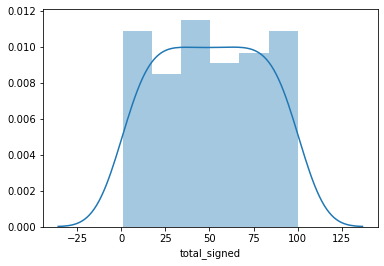

In [93]:
sns.distplot(agent_group['total_signed'].rank())

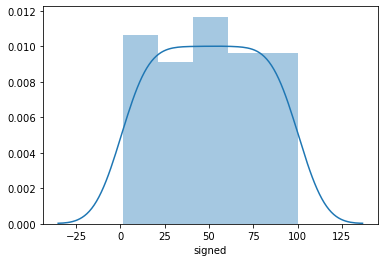

In [94]:
sns.distplot(agent_group['signed'].rank())

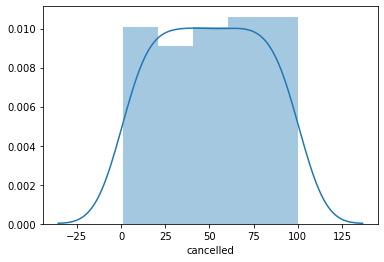

In [95]:
sns.distplot(agent_group['cancelled'].rank())

For Further analysis I would evaluate the cacelled column and focus on parameter to keep the low thershold of cancellation. Since the Rank function calculated averages when no argument, we can work with the Standard Deviation of cancellation. 